Import Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer

import plotly.io as pio
pio.renderers
pio.renderers.default = "browser"

import Preprocess as pp
import Viz as viz

np.set_printoptions(precision = 3)

Set defaults

In [2]:
RANDOM_STATE = 42

df, column_trans, idx, df_orig = pp.preprocessData()

X = df_orig.drop(columns=['land_sale_price', 'deed_date', 'total_sale_price'])
y = df_orig['total_sale_price']

In [3]:
le = LabelEncoder()

X['physical_zip_code'] = le.fit_transform(X['physical_zip_code'].astype(str))
X['physical_city'] = le.fit_transform(X['physical_city'].astype(str))


In [4]:
X.dtypes

assessed_building_value           float64
story_height                      float64
heated_area                         int64
bath                              float64
bath_fixtures                       int64
physical_zip_code                   int32
physical_city                       int32
mort_rate                         float64
unemploy_rate                     float64
pop_growth_rate                   float64
covid_cases                       float64
is_covid                            int64
lumber_price                      float64
metals_price                      float64
build_price                       float64
int_rate                          float64
supply                            float64
demand                            float64
year                                int64
crime                               int64
electric                            int64
gas                                 int64
water                               int64
sewer                             

In [5]:
#samples for running Silhouette Score to shortern processing time
sample_full = pd.DataFrame(df_orig).sample(frac=0.2, replace=False, random_state=RANDOM_STATE).reset_index().drop(columns=['index'])

# K-Means Clustering

## Elbow Method

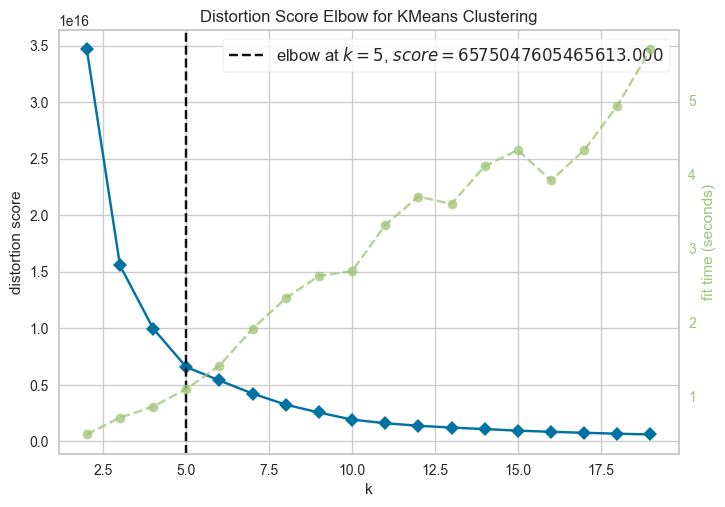

In [15]:
# initiate kmeans instance
kmeans = KMeans(init='k-means++', random_state=RANDOM_STATE)
k_start = 2
k_end = 20

# show results for full dataset
elb_visualizer = KElbowVisualizer(kmeans, k=(k_start, k_end)).fit(X).show()  

## Clustering Scores

c:\Users\choit\OneDrive\Coursera\SIADS696\Project2\SIADS-696-Milestone-II\Viz.py:265: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



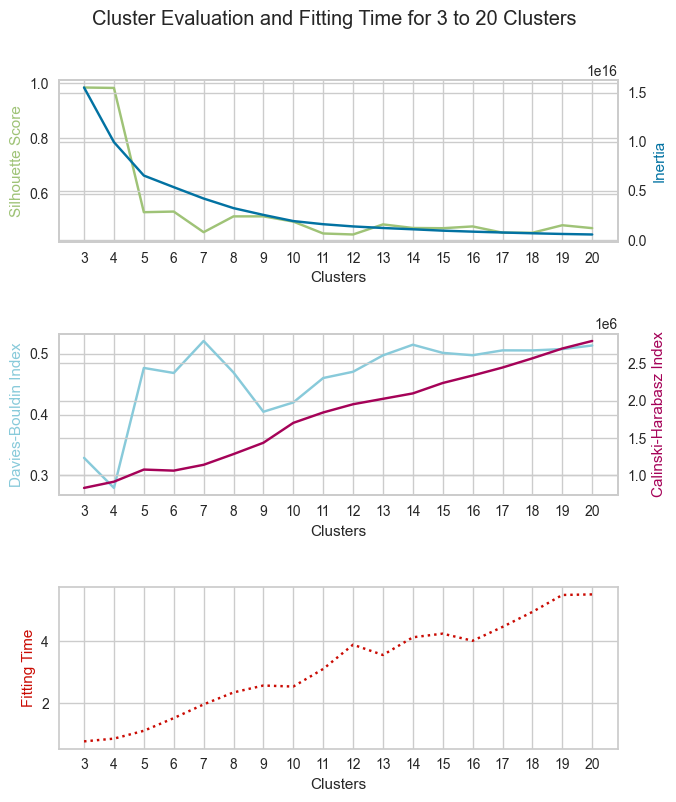

In [12]:
viz.plot_silhouette(X, kmeans=KMeans(init="k-means++", random_state=RANDOM_STATE), k_start = 3, k_end = 20)

Silhouette Plots

For n_clusters = 2 The average silhouette_score is : 0.9825816364530241
For n_clusters = 3 The average silhouette_score is : 0.5360460028579832
For n_clusters = 4 The average silhouette_score is : 0.5361776203621713
For n_clusters = 5 The average silhouette_score is : 0.4578870090455495
For n_clusters = 6 The average silhouette_score is : 0.5172142579481485
For n_clusters = 7 The average silhouette_score is : 0.49894972239140273
For n_clusters = 8 The average silhouette_score is : 0.4611959525133126


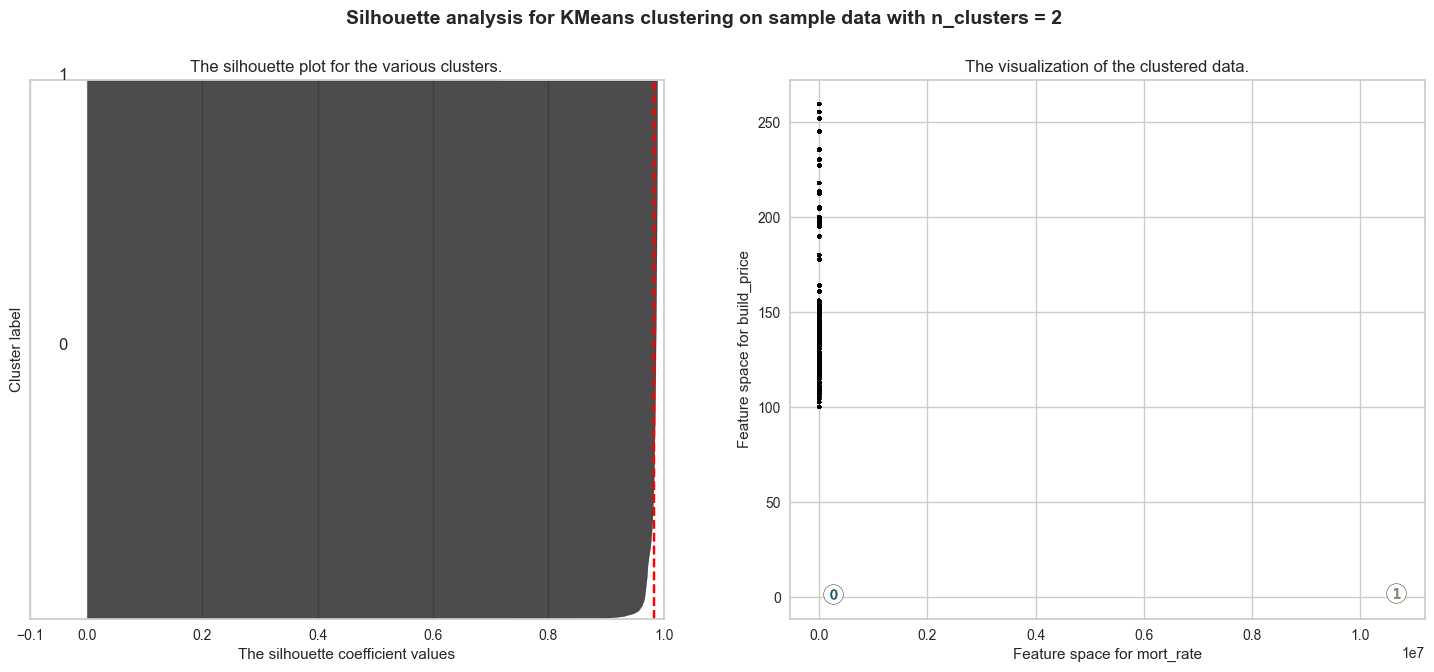

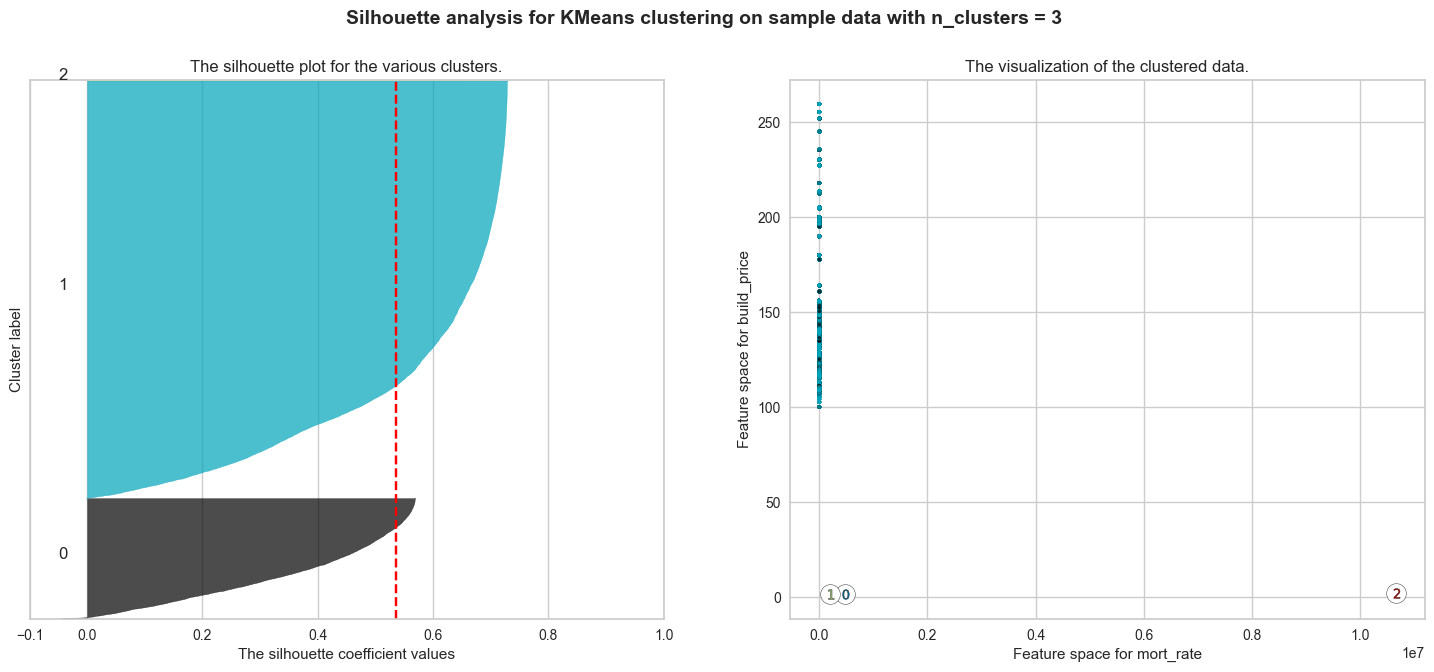

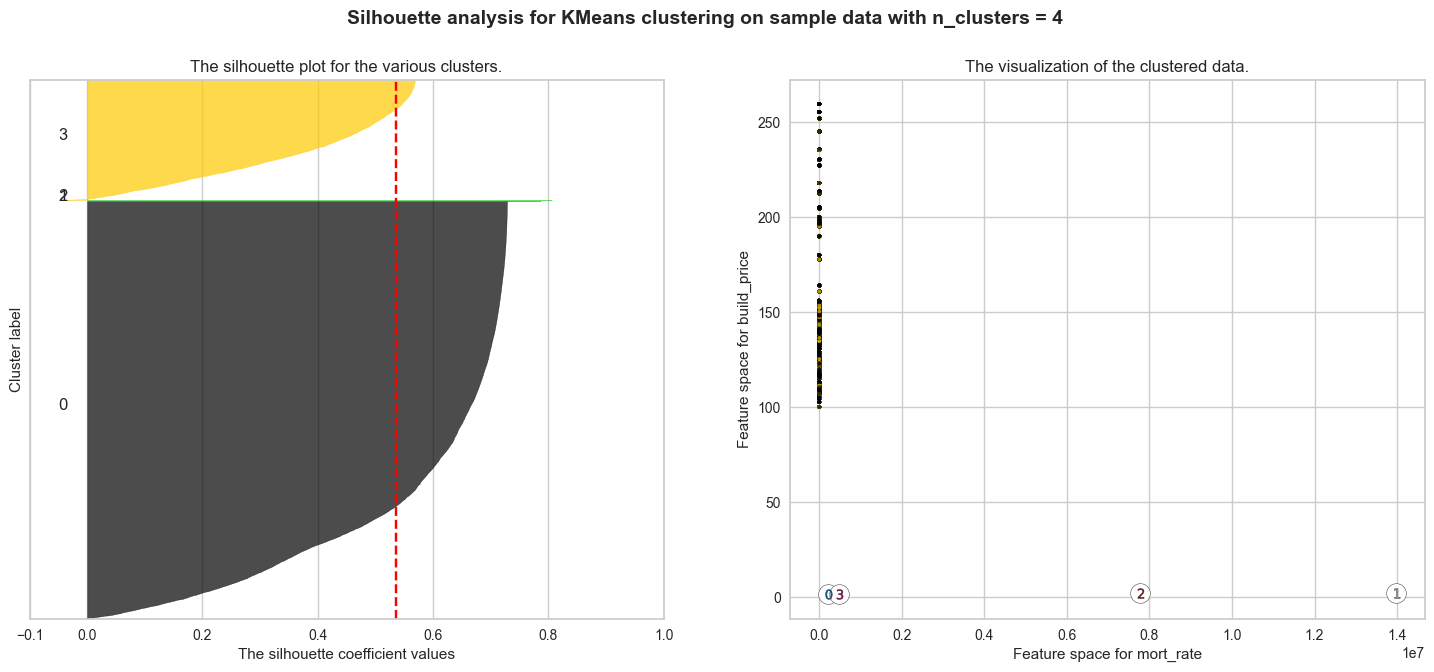

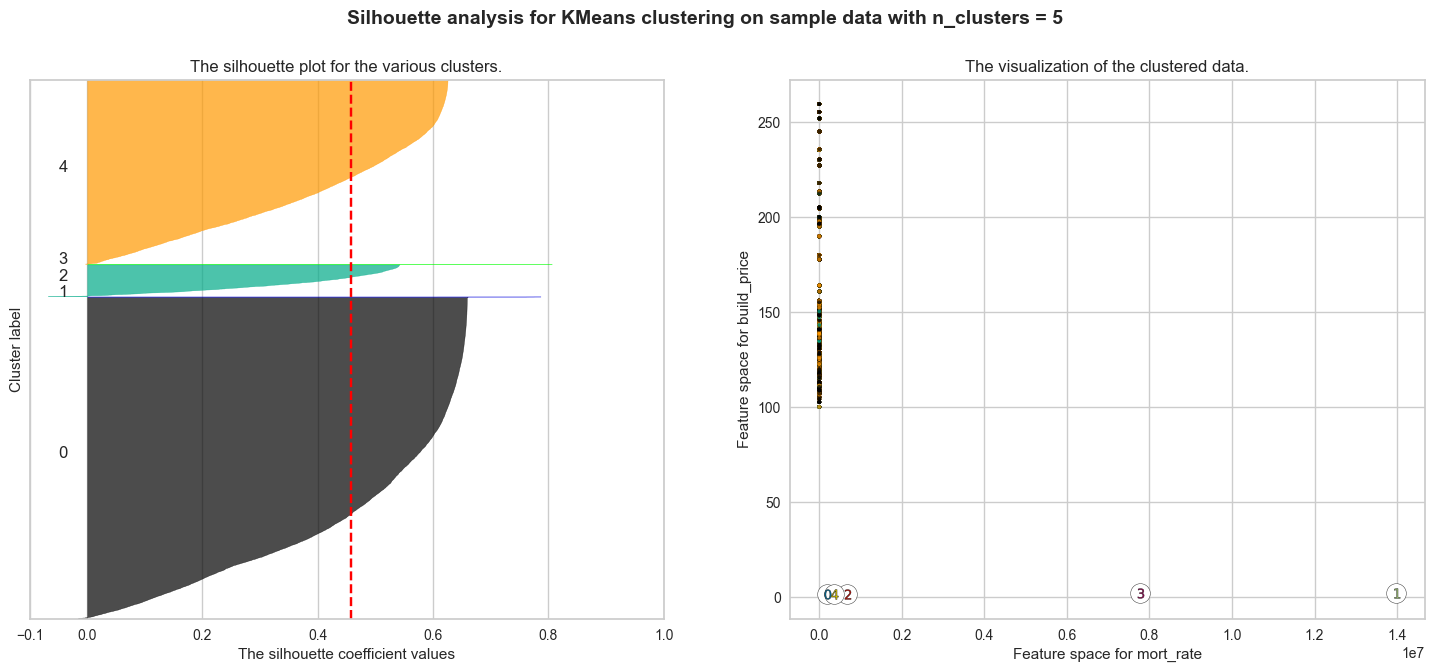

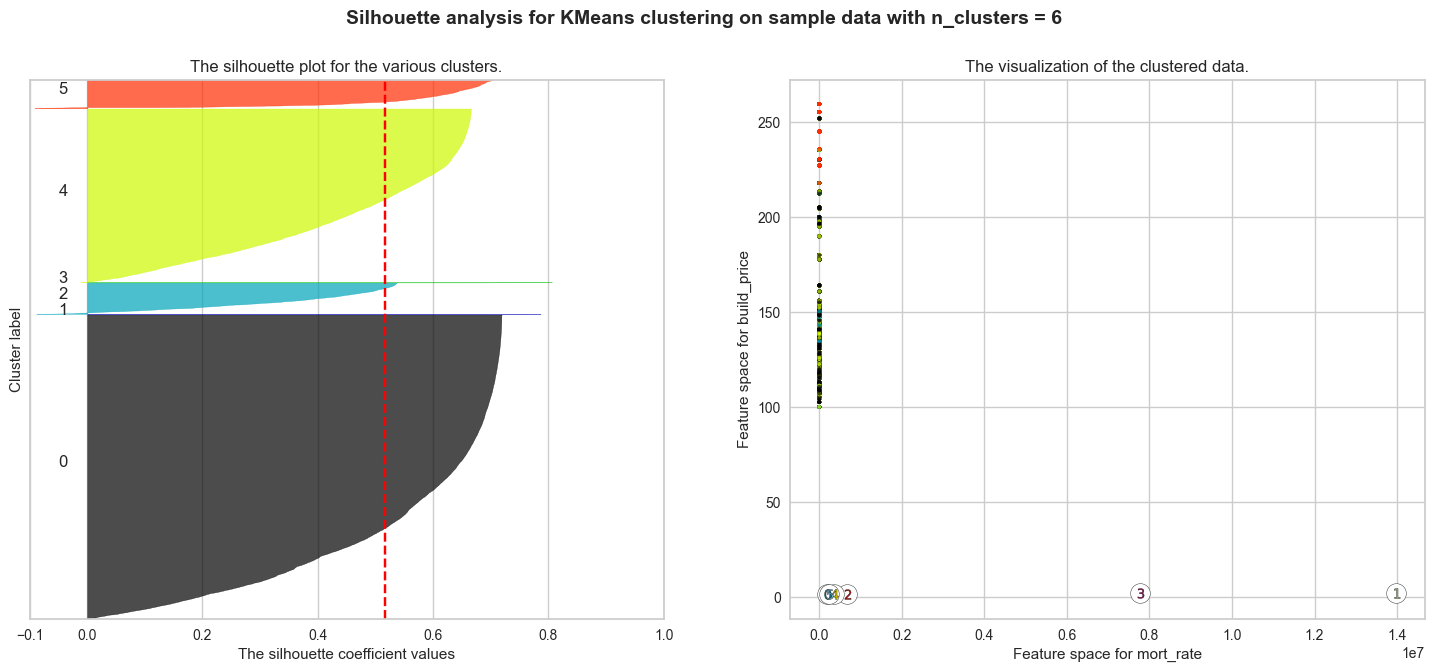

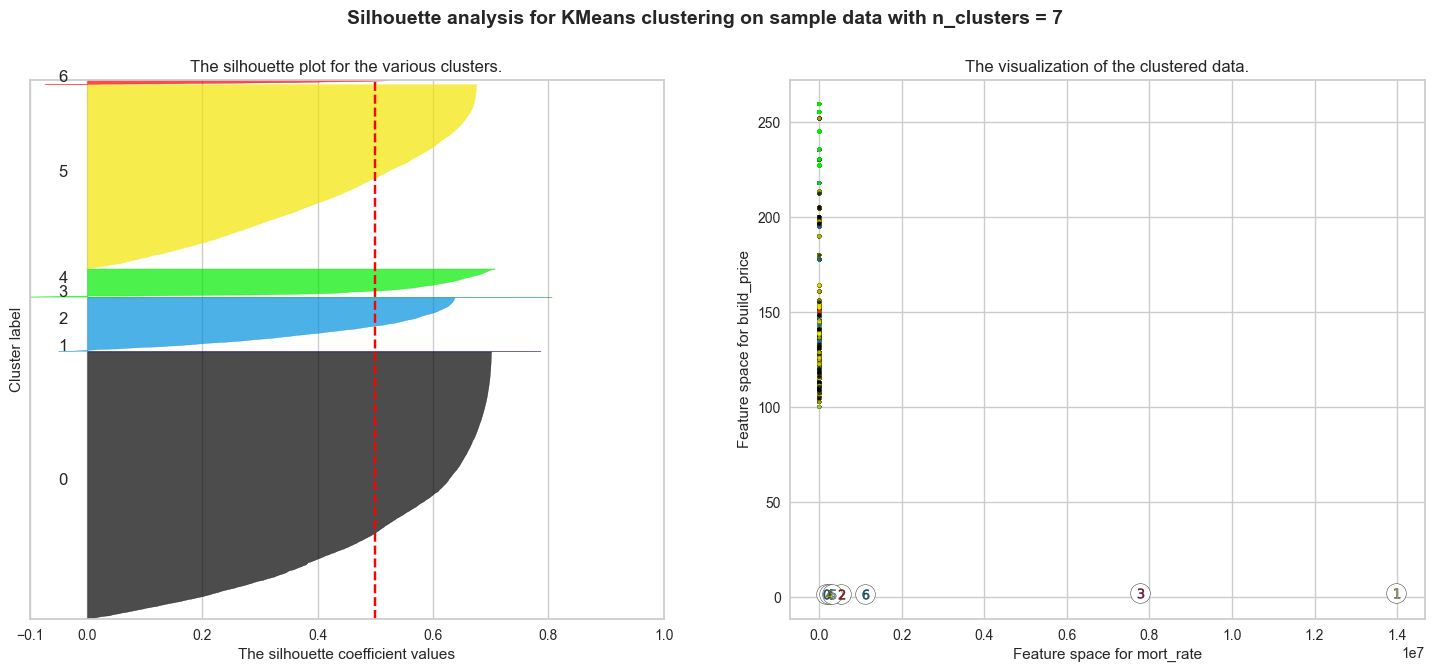

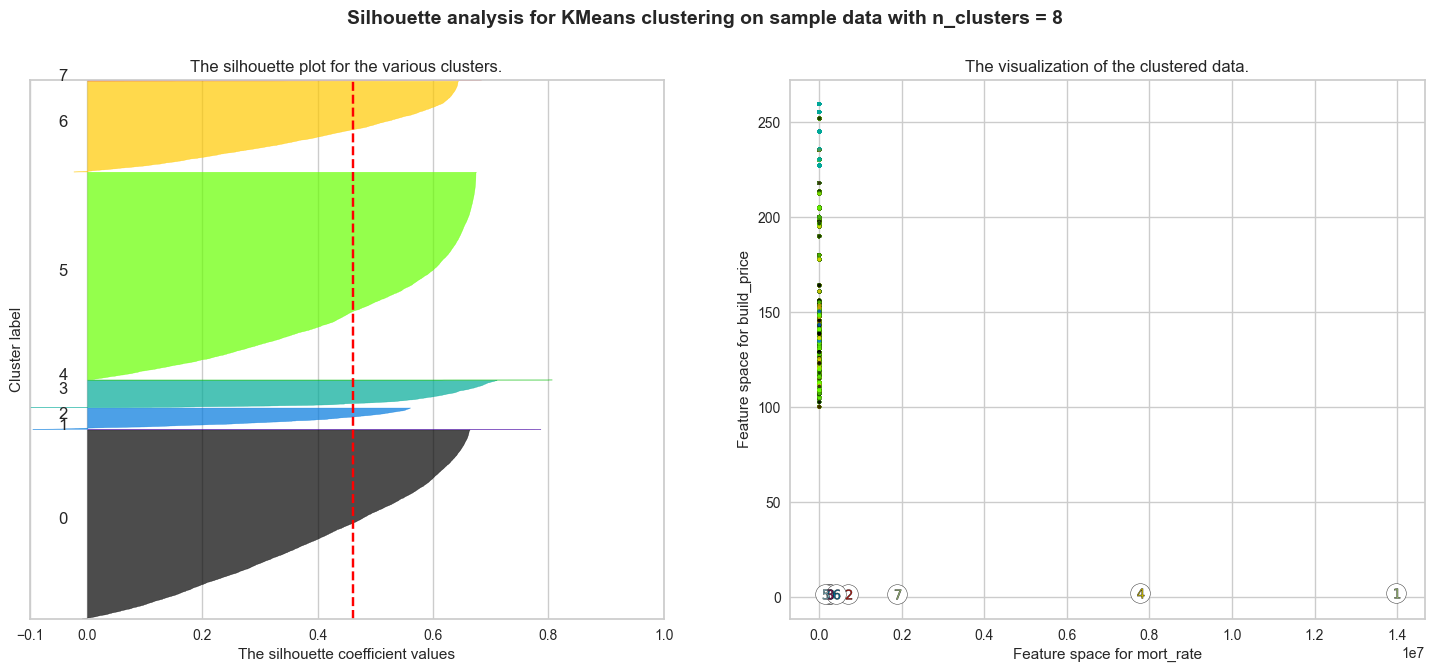

In [14]:
range_n_clusters = [2,3,4,5,6,7,8]
ax = 'mort_rate'
ay = 'build_price'

viz.draw_silhouette(X, k=range_n_clusters, ax=ax, ay=ay, random_state=RANDOM_STATE)